In [3]:
matrix_destination = "matrix.cellQC.geneQC.normalised.ccClean.combat.rds"
source("load_matrix.R")

Loading matrix from source file matrix.cellQC.geneQC.normalised.ccClean.combat.rds...
5052 genes x 132 cells. (132) unique barcodes.


# Clustering

Now that our data is filtered, normalised, cleaned of cell-cycle variations, and free from technical artefacts, we will attempt to perform cell-type clustering.

In [4]:
suppressWarnings(library(SC3))

## SC3

We will use the SC3 libary which combines heirarchal clustering and k-means. It operates by making an inital estimate on the number of clusters (*k*), and then iterates through different levels of k (encompassing the estimated) to determine a stable value of k which should results in the most optimal clustering

In [6]:
# Estimate
sce <- sc3_estimate_k(sce)

# Write feature names to feature_symbol
rowData(sce)$feature_symbol = rownames(sce)       # must connect this slot for SC3
message("Best guess on the number of clusters: ", metadata(sce)$sc3$k_estimation)

Estimating k...
Best guess on the number of clusters: 2


Now we can run the SC3 analysis:

In [8]:
krange <- 2:10
sce <- sc3(sce, ks = krange, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


With clustering finished, and a consensus matrix constructed, we can now attempt to plot our cells. Let us first observe the relative stability of each of the clusters defined for a specific *k*. A [higher stability](https://rdrr.io/bioc/SC3/man/calculate_stability.html) index, a higher chance that the same clustering appears in other values of k.

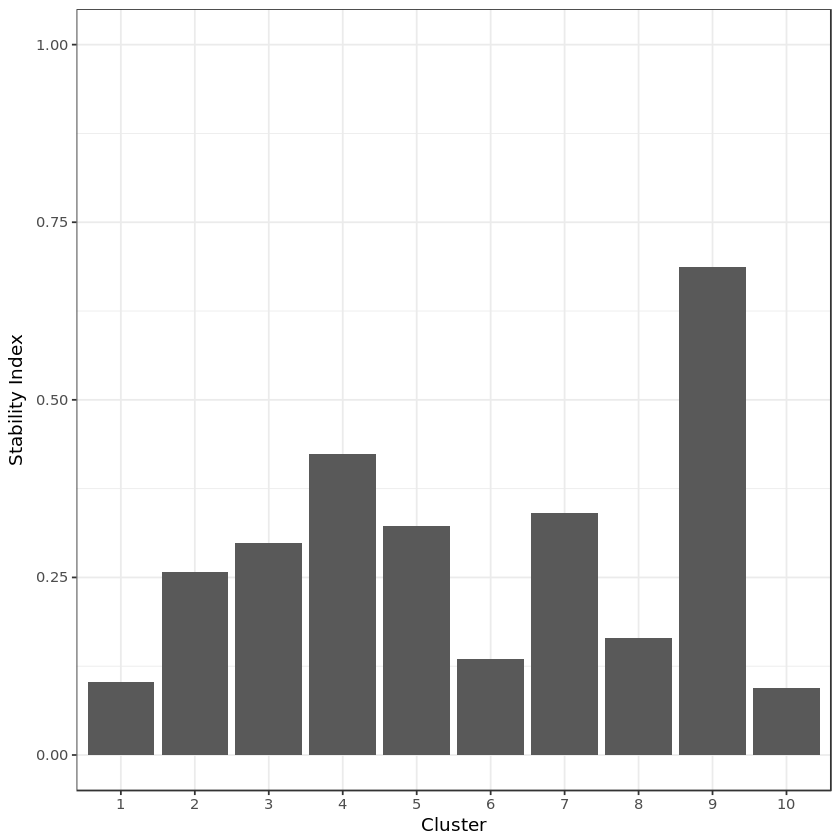

In [14]:
sc3_plot_cluster_stability(sce, tail(krange, n=1))

Plots
k = 2


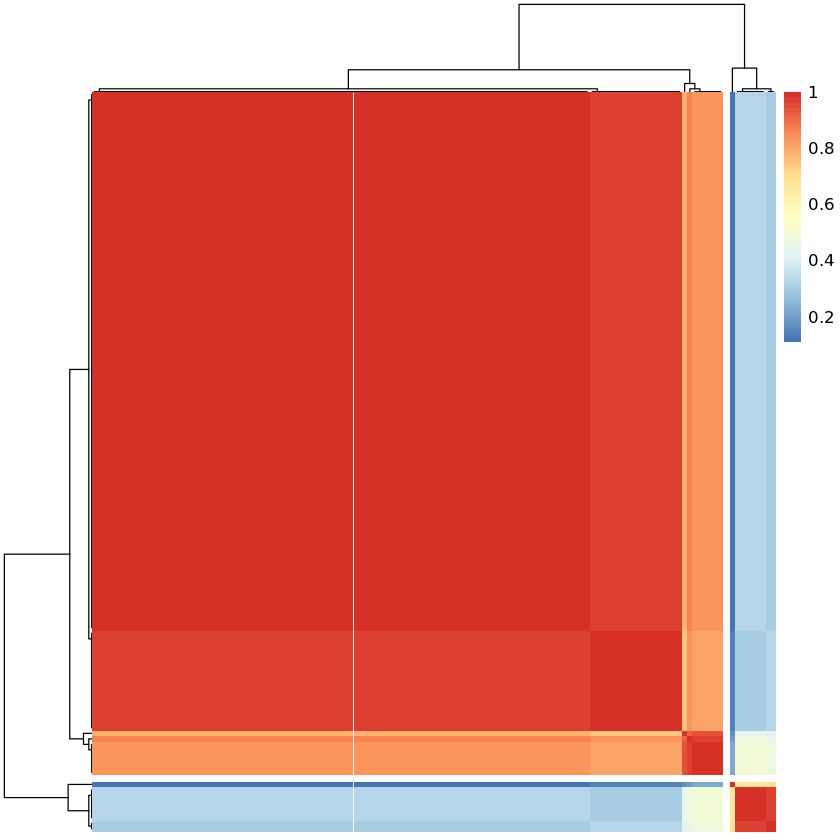

k = 3


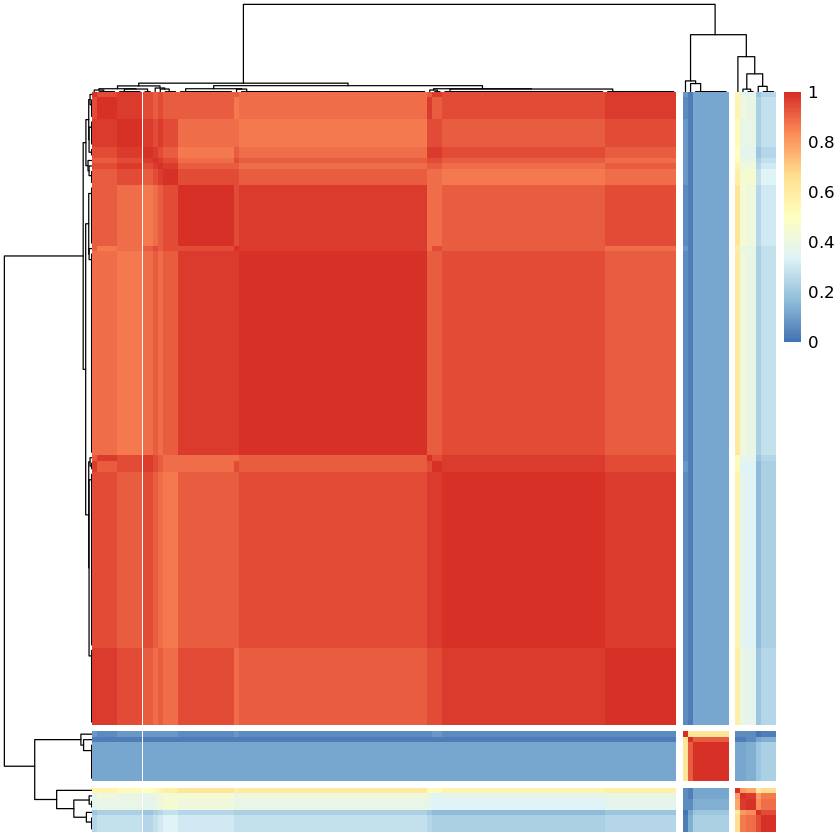

k = 4


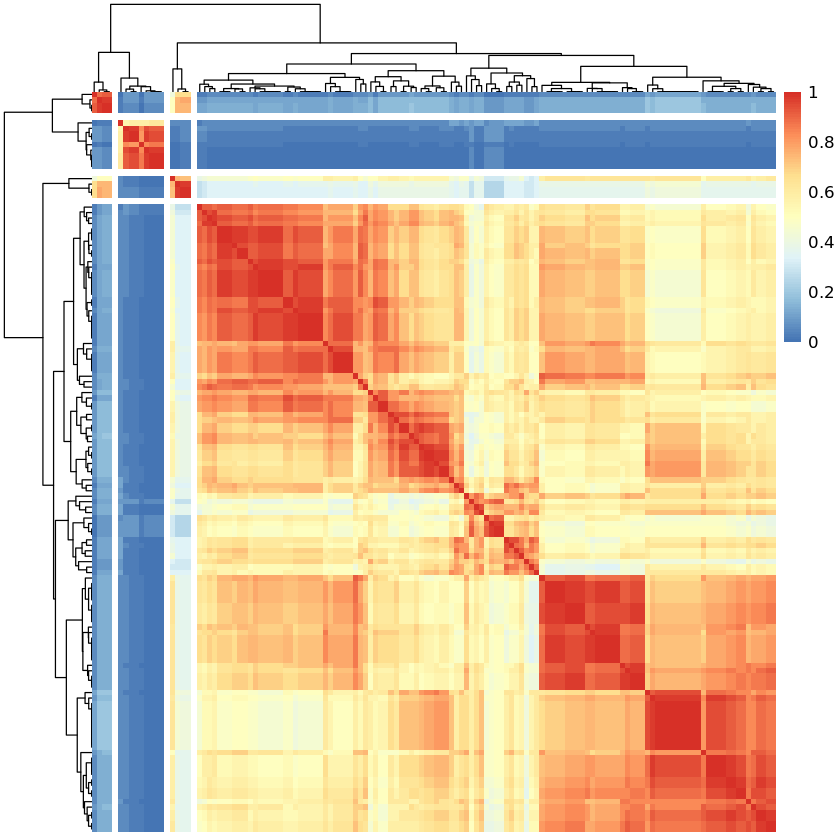

k = 5


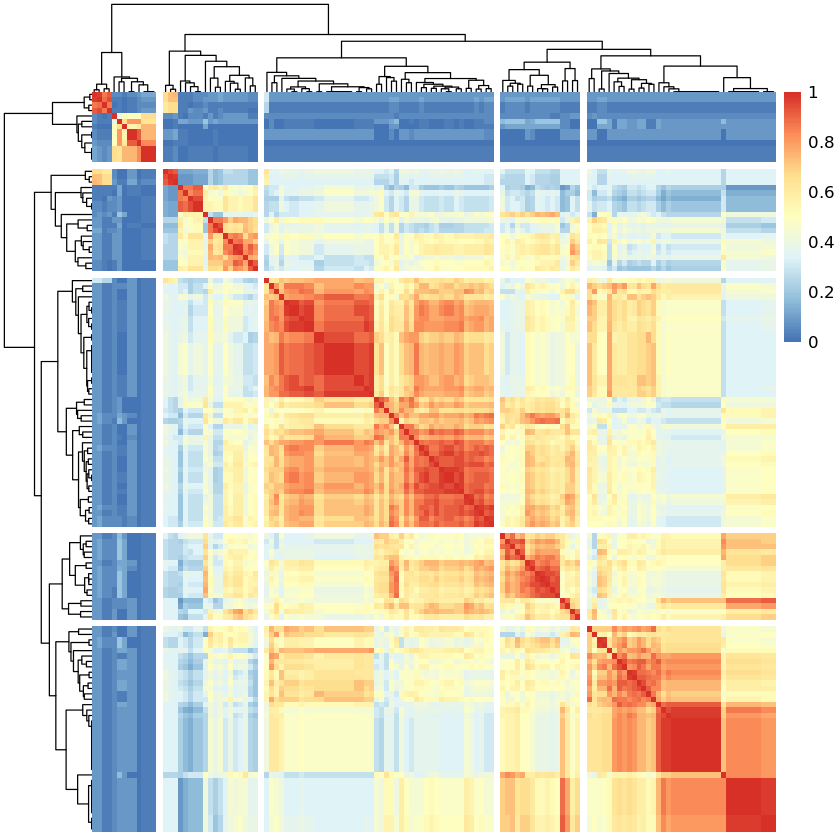

k = 6


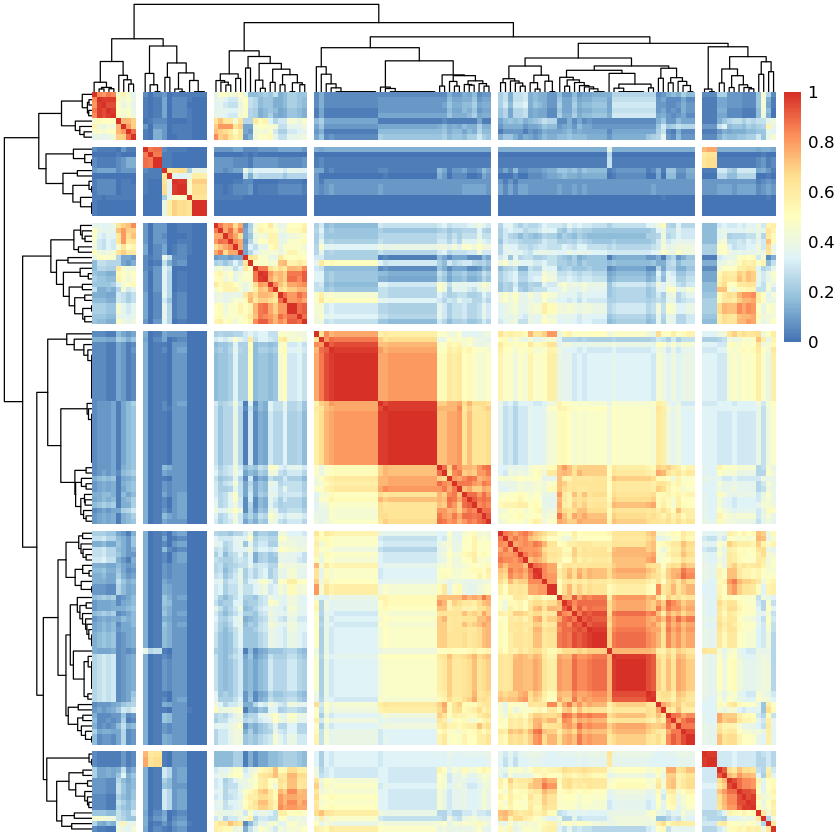

k = 7


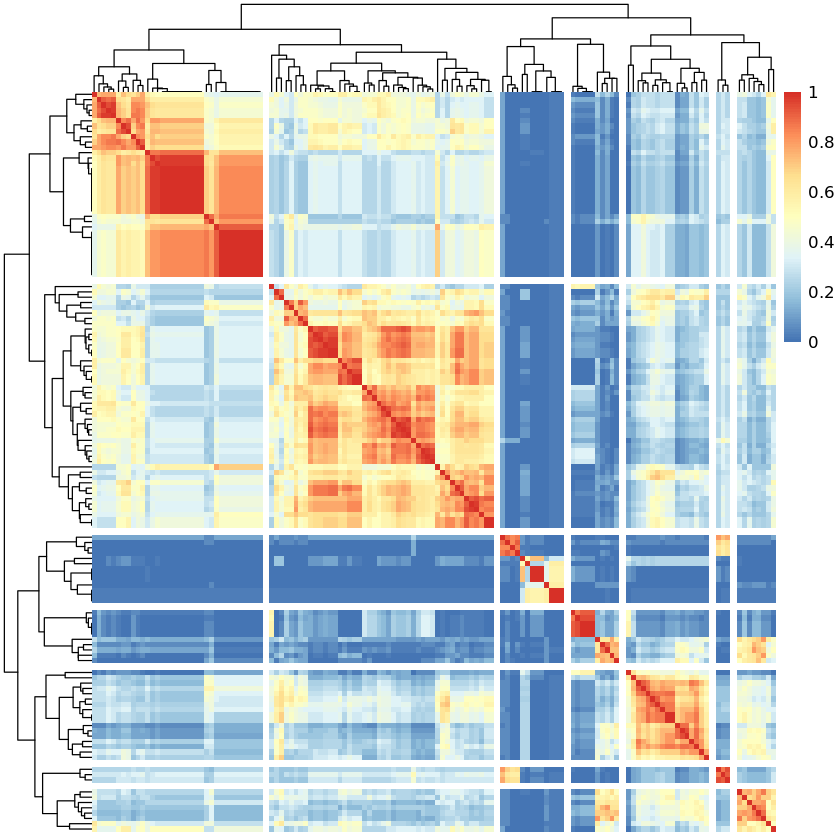

k = 8


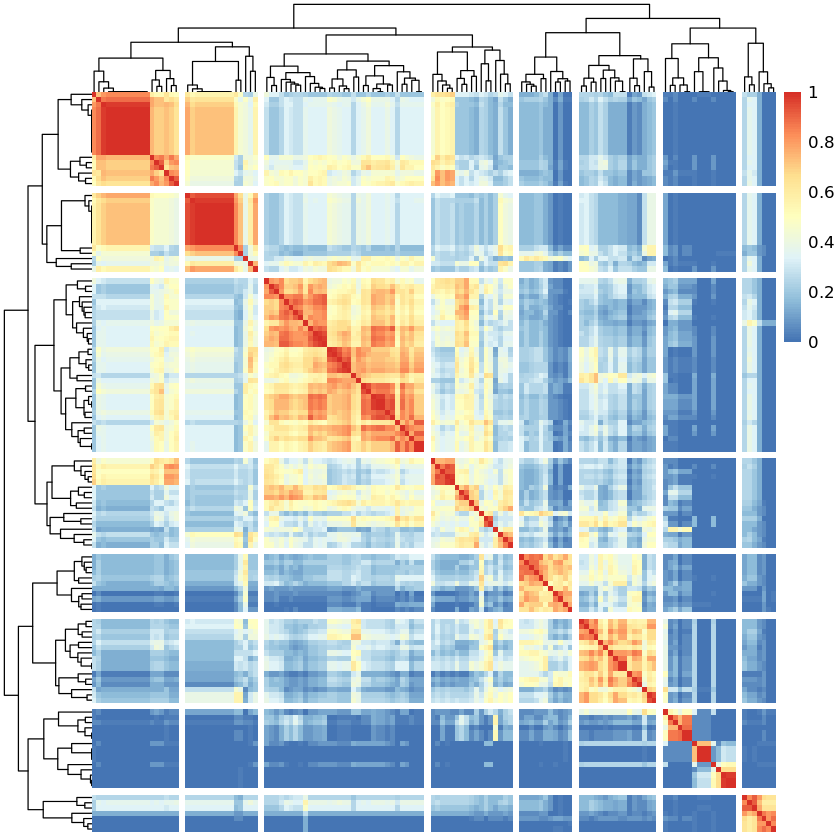

k = 9


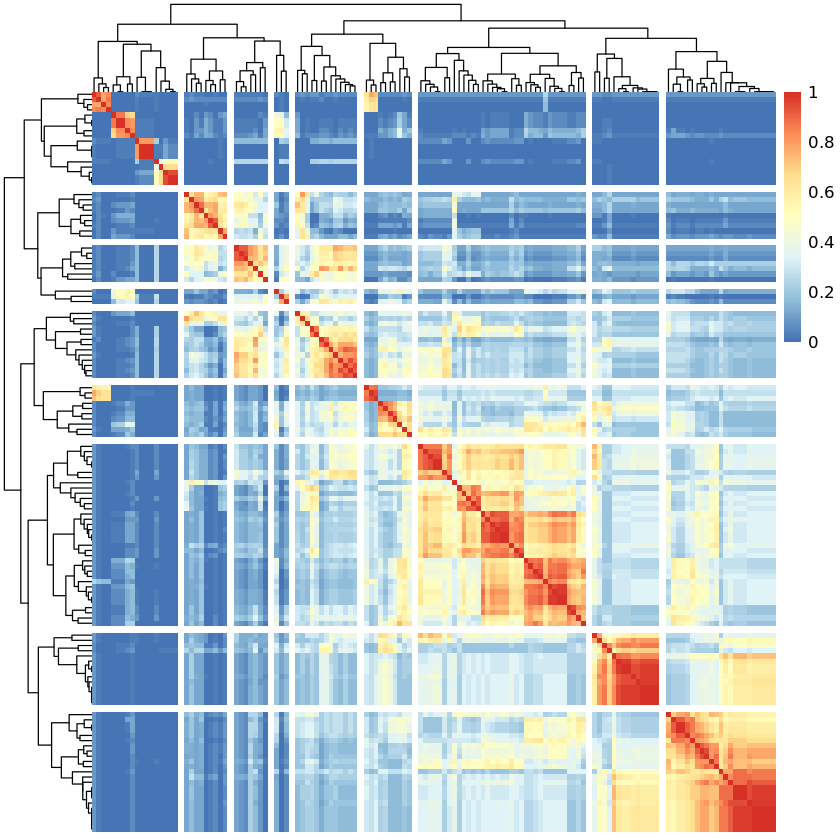

k = 10


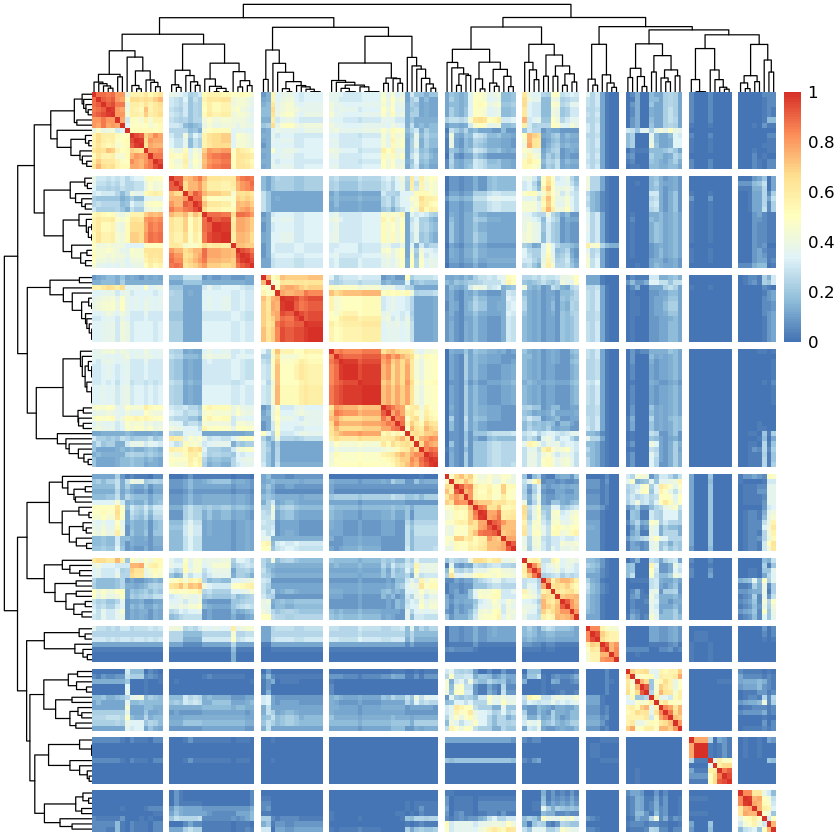

In [61]:
library(gridExtra)

#multiplot(    # doesn't work for sc3

cat("Plots\n")
for (k in krange){   
    sc3_plot_consensus(sce, k)
    cat(sprintf("k = %.0f\n", k))
}


###### notes

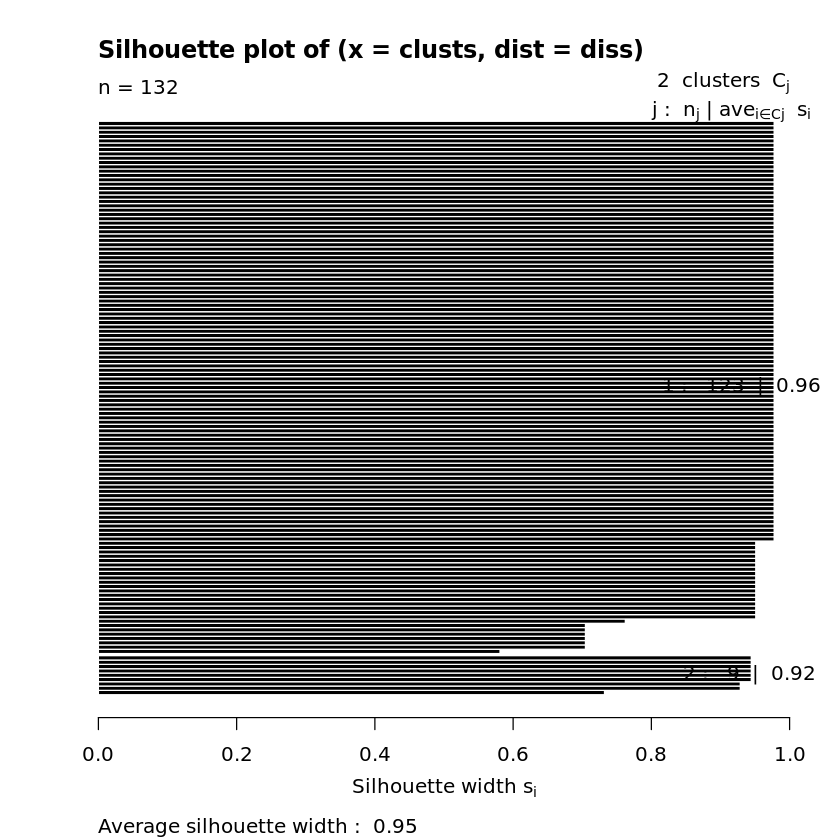

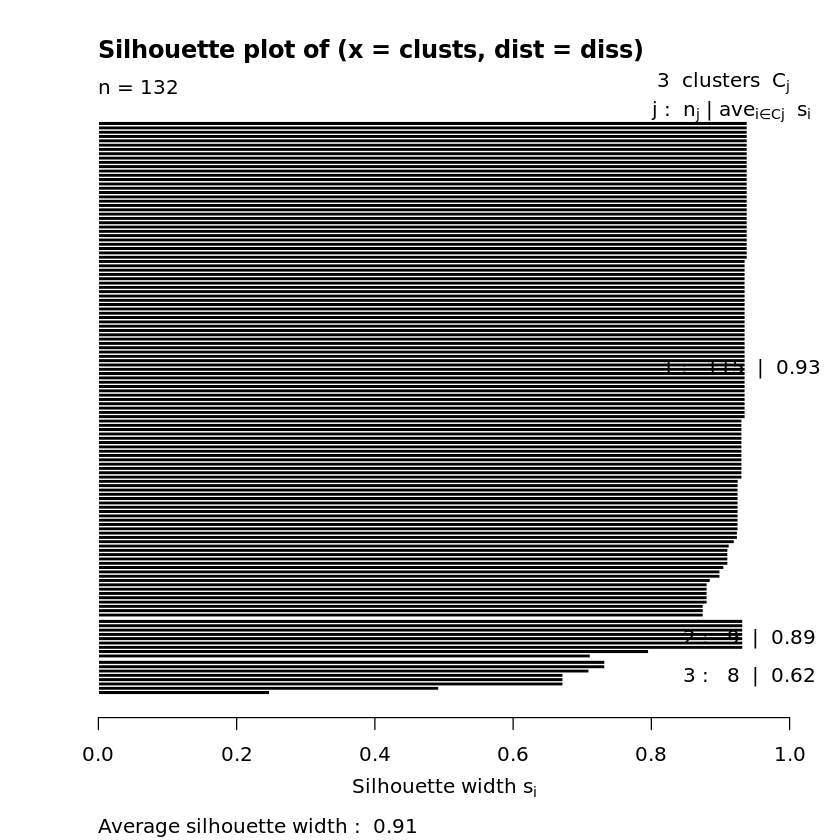

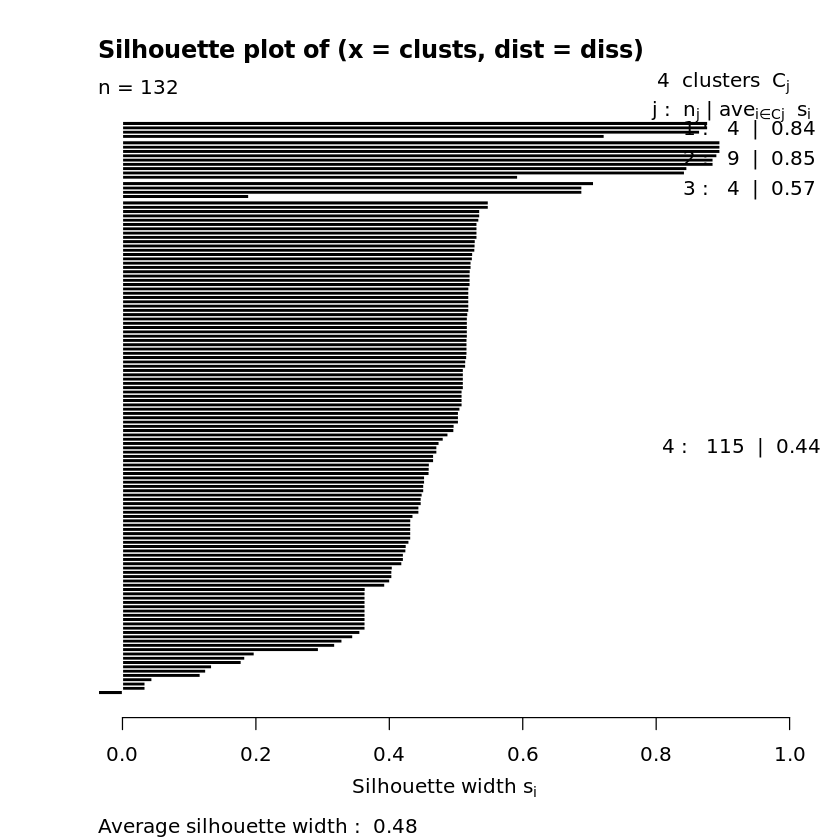

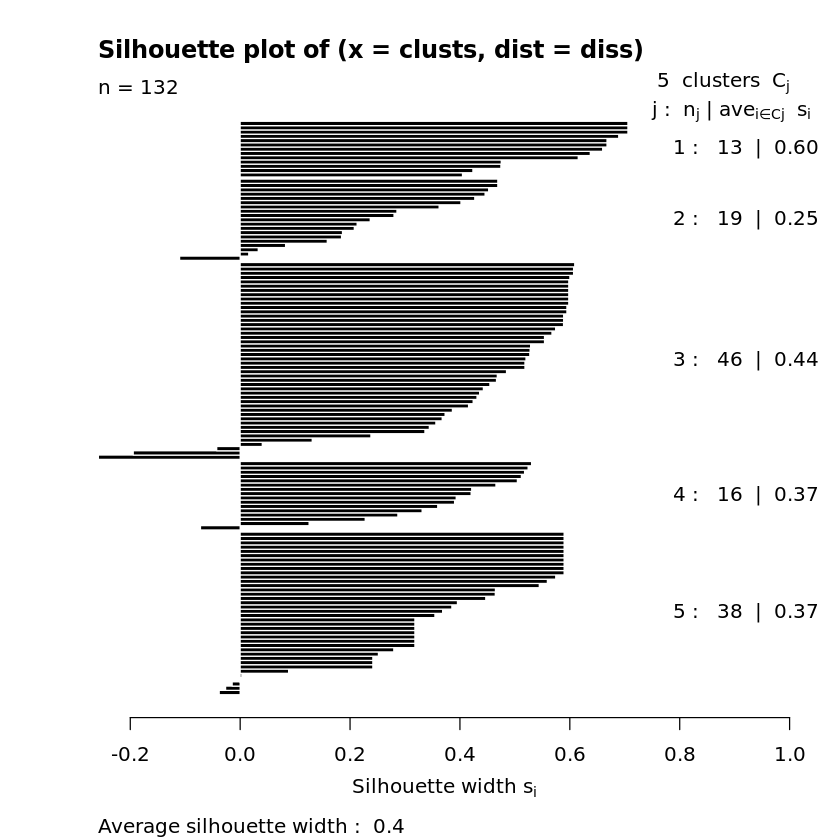

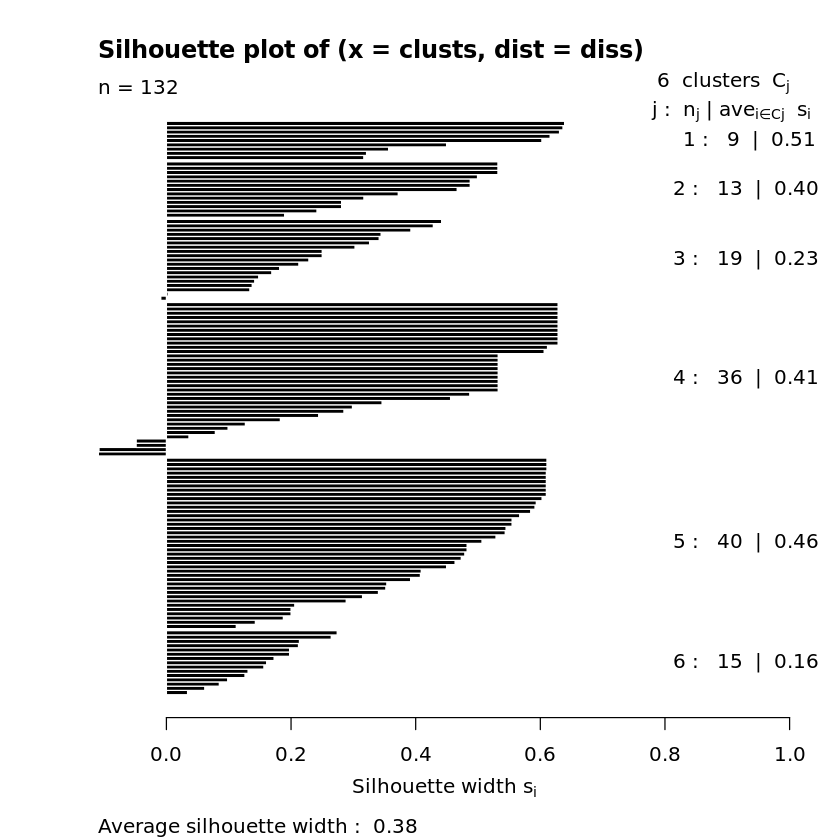

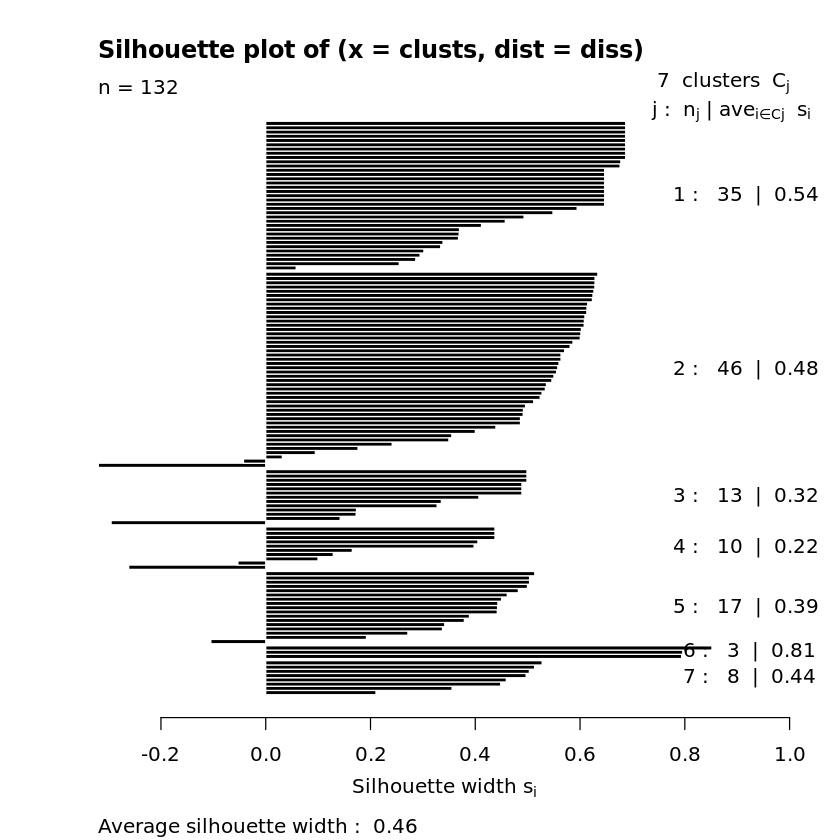

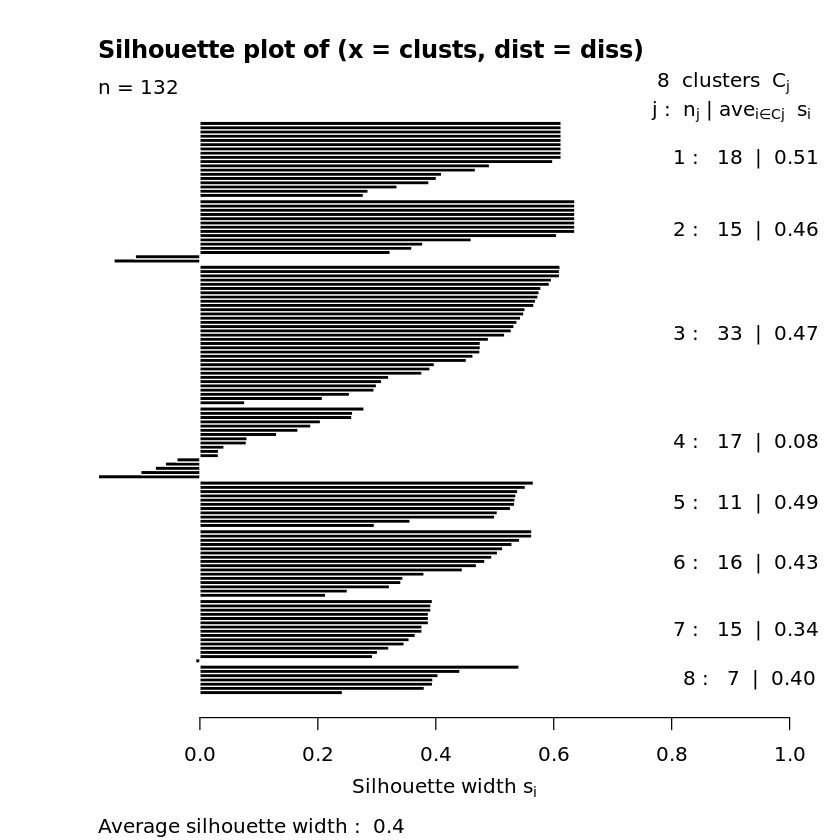

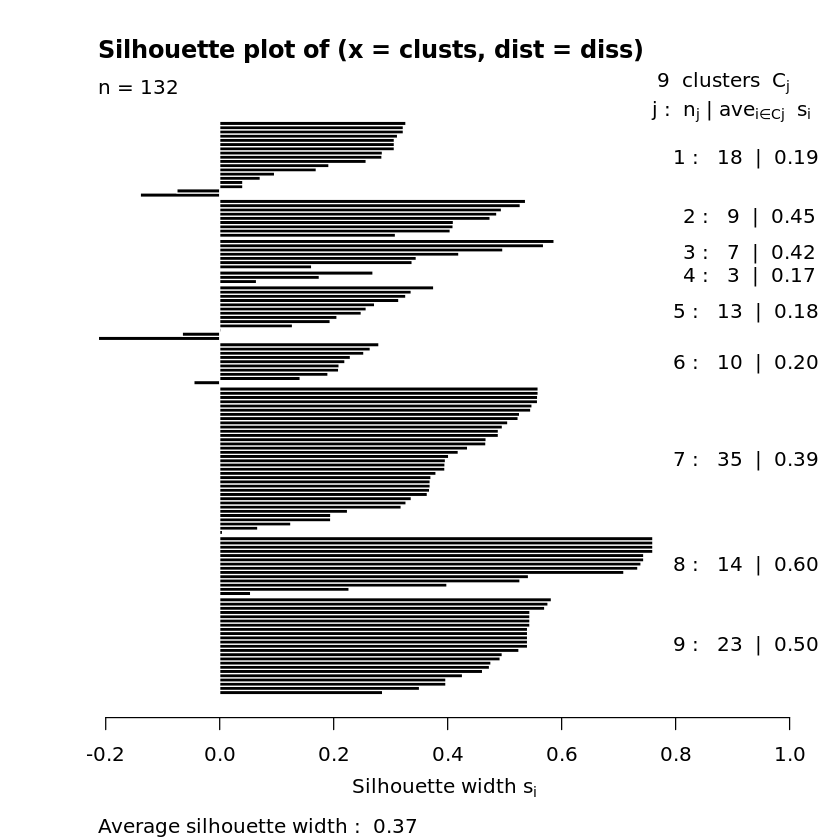

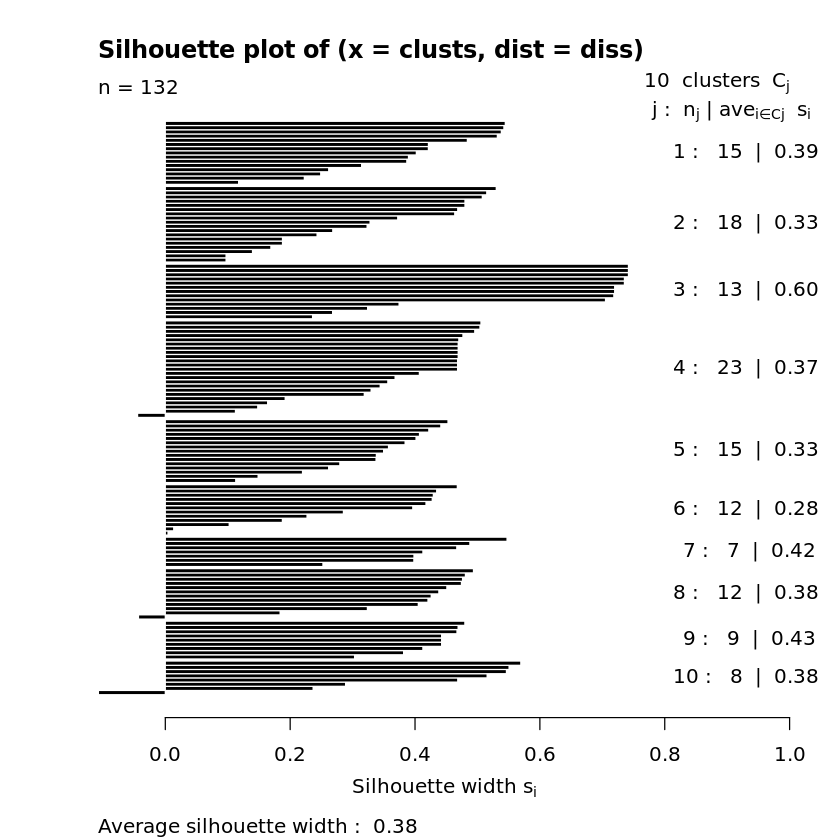

In [63]:
for (k in krange){
    sc3_plot_silhouette(sce, k)
}

##### more notes

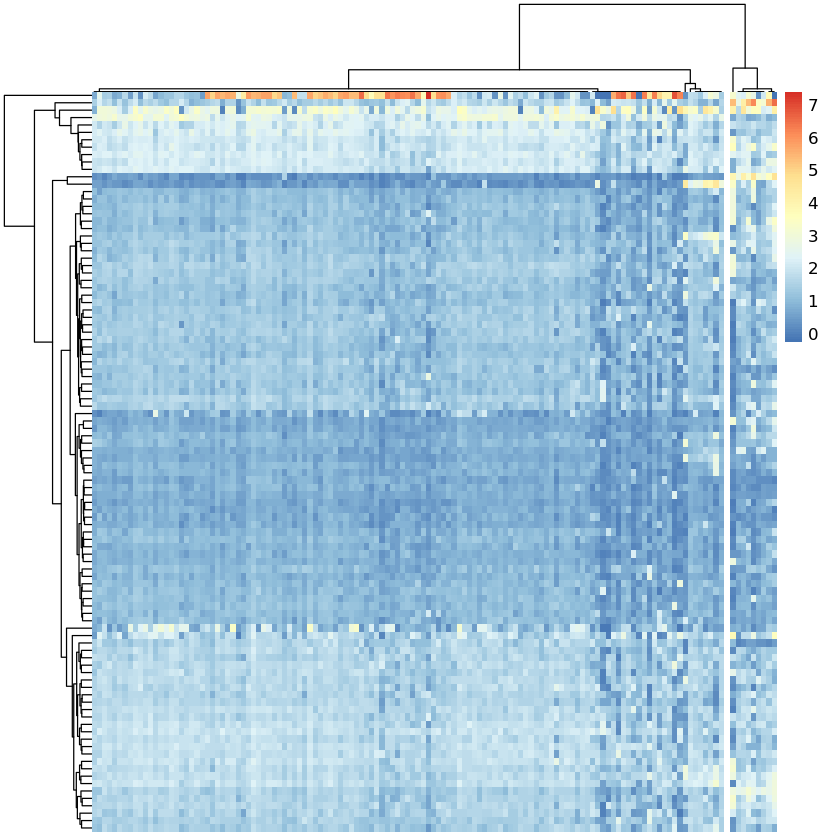

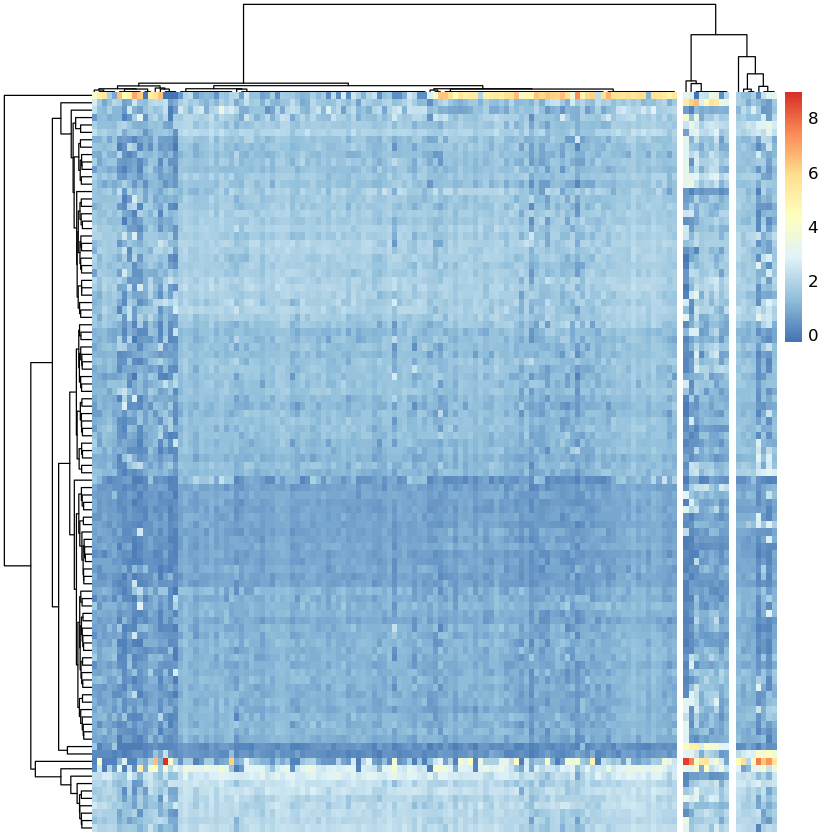

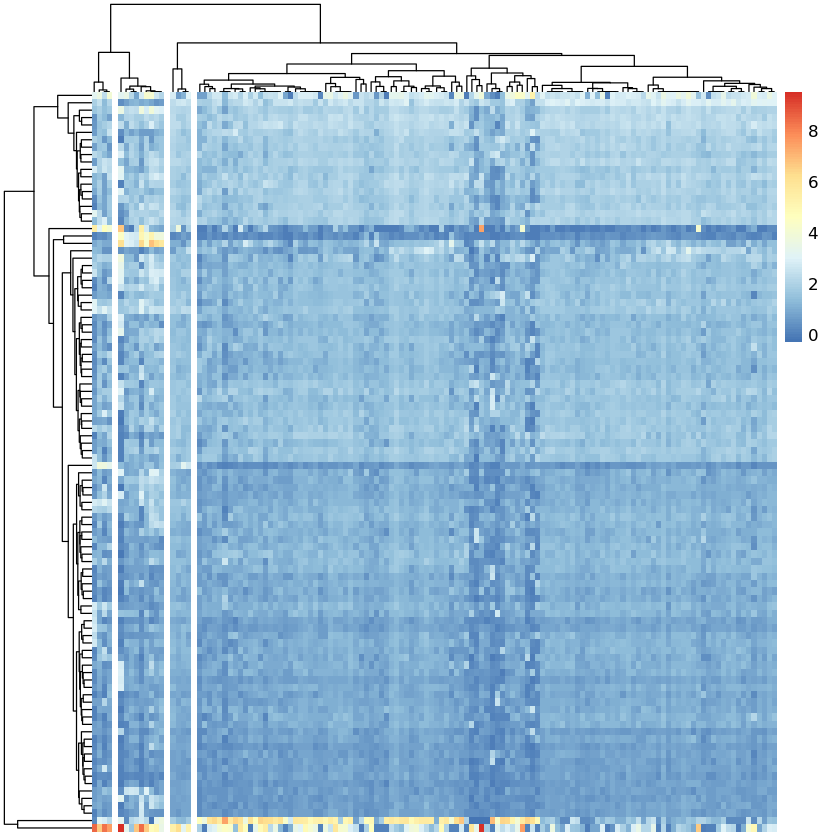

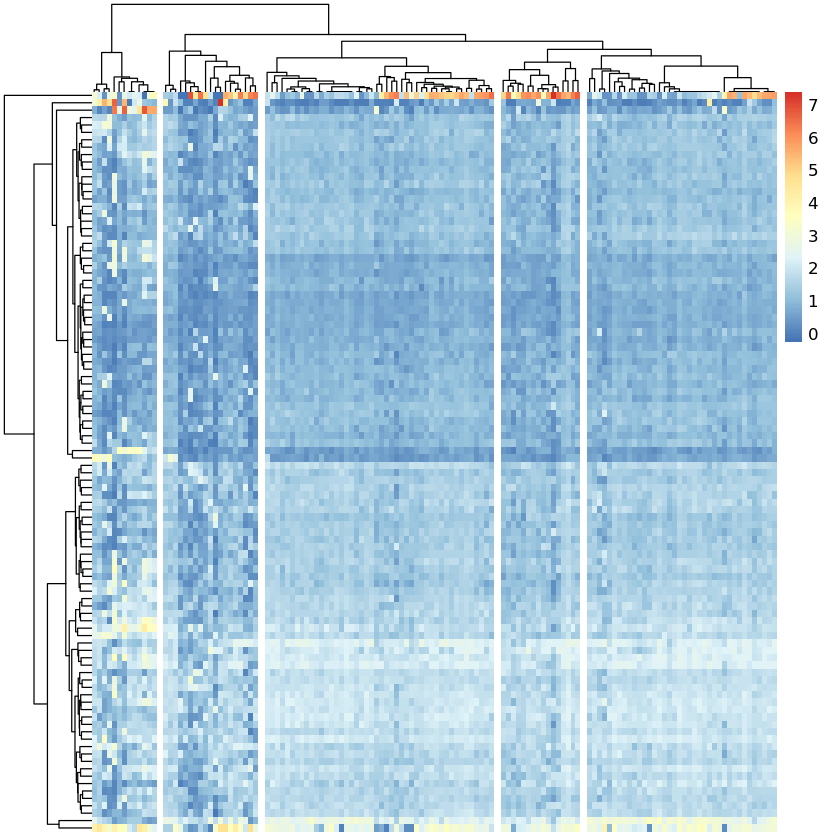

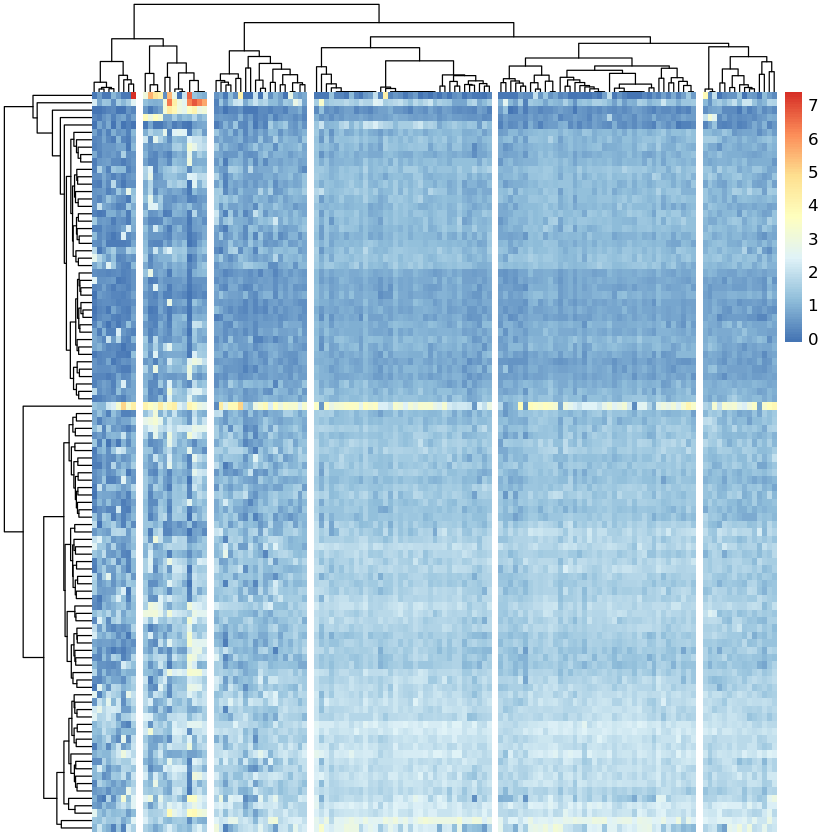

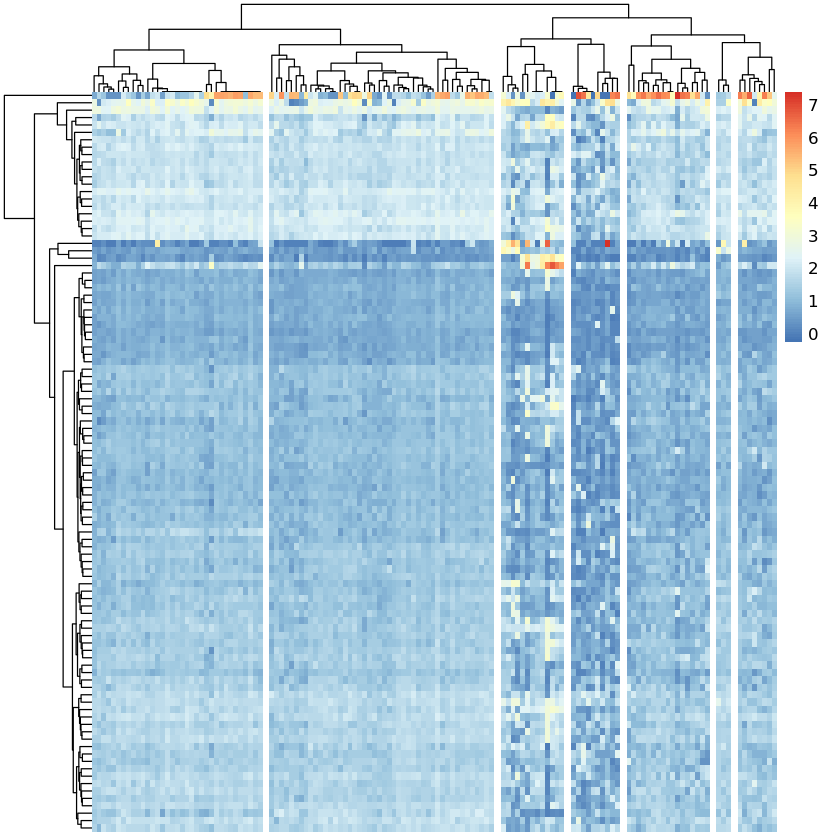

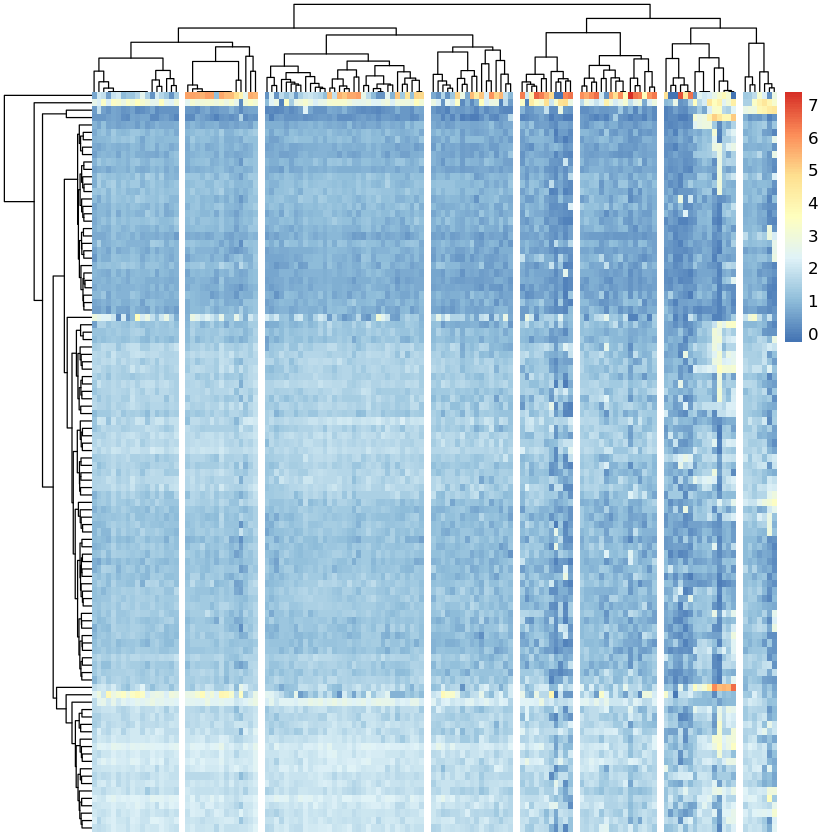

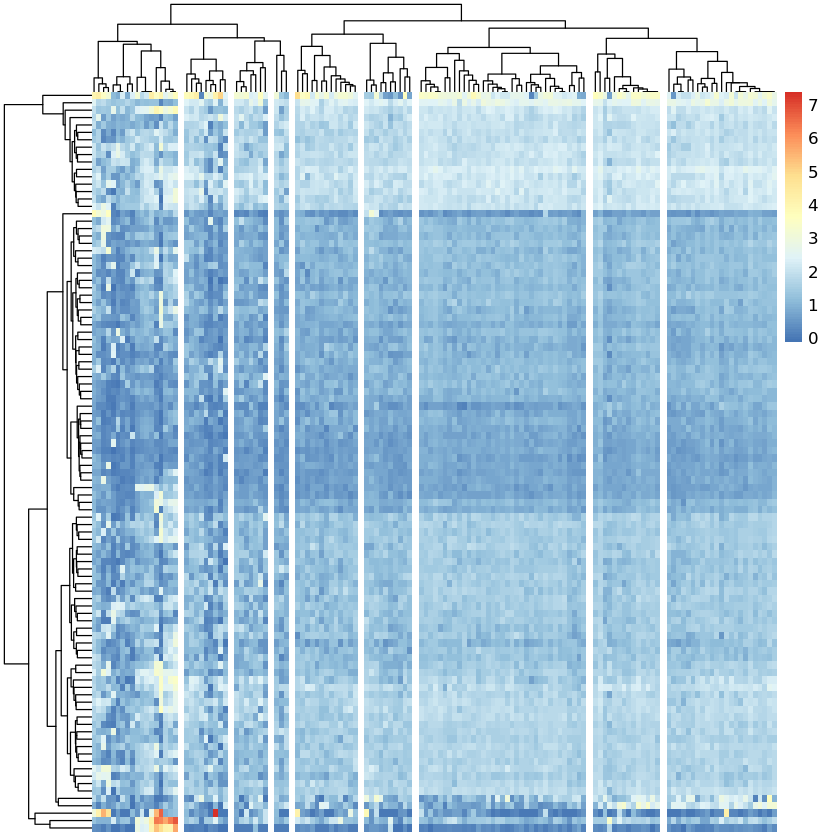

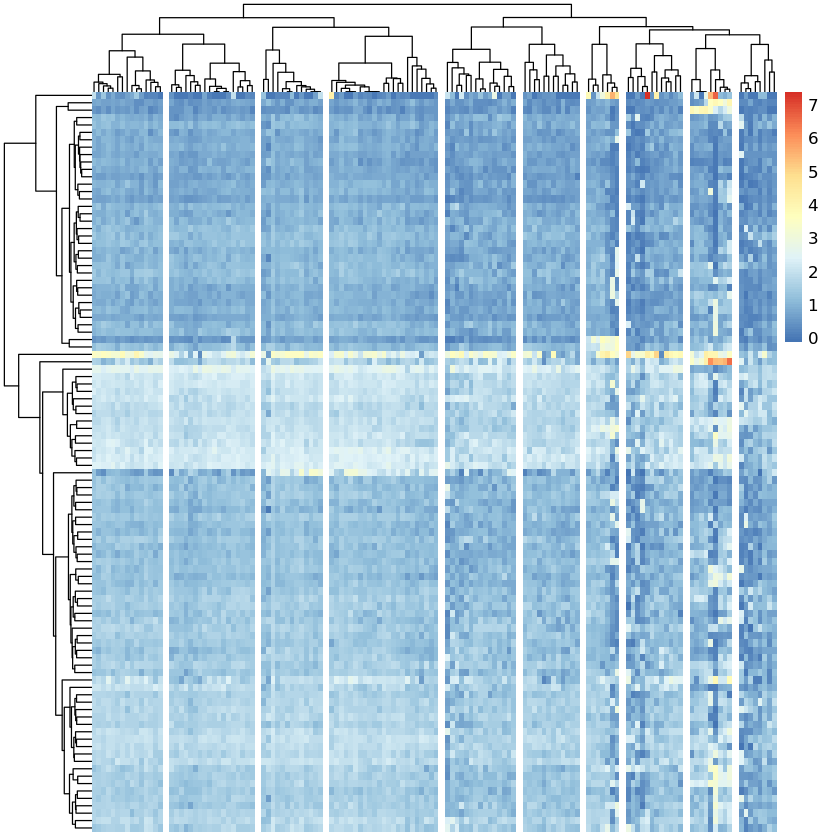

In [68]:
for (k in krange){
    sc3_plot_expression(sce, k)
}

Notes

k = 2


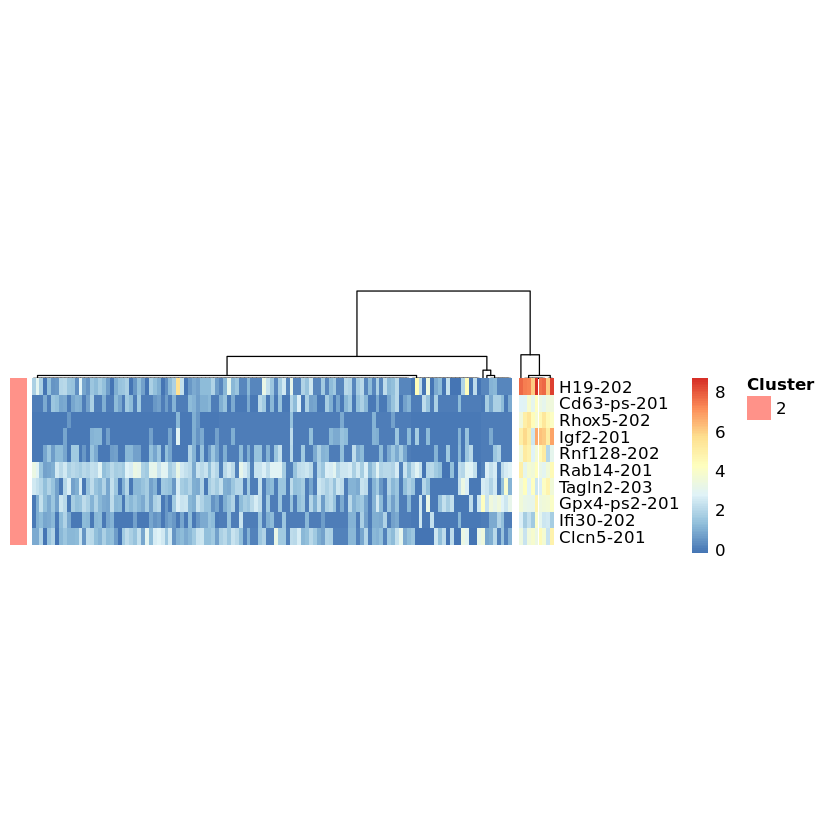

k = 3


k = 4


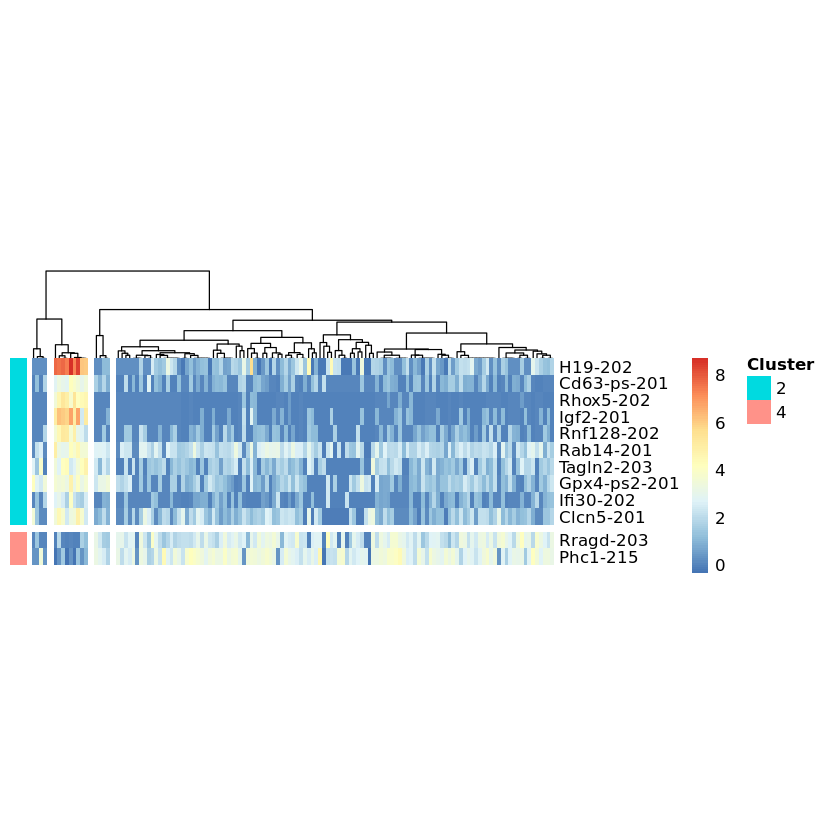

k = 5


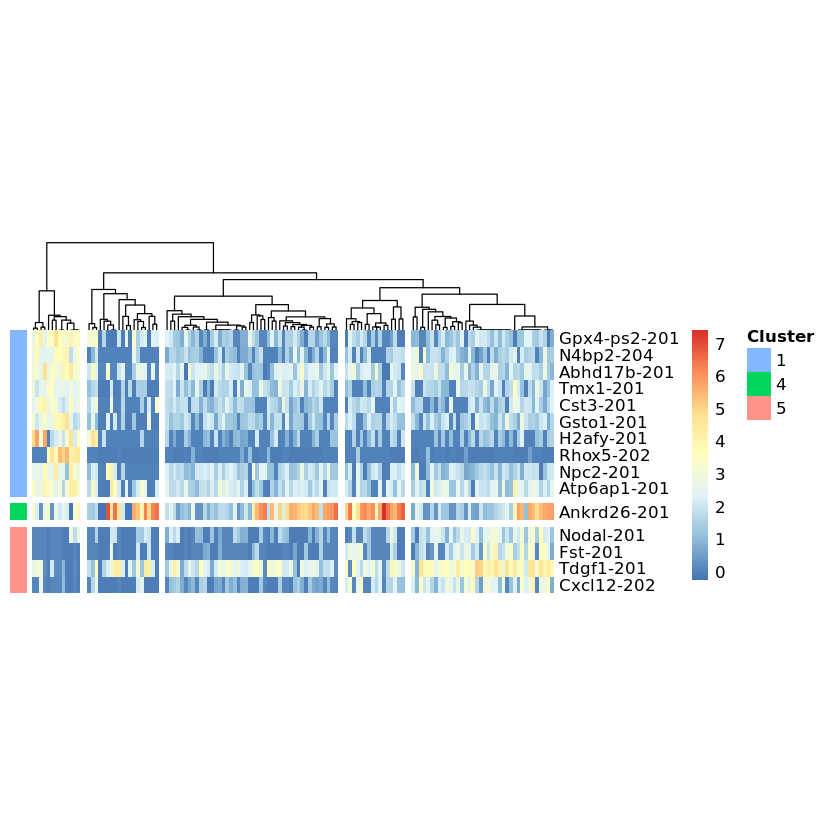

k = 6


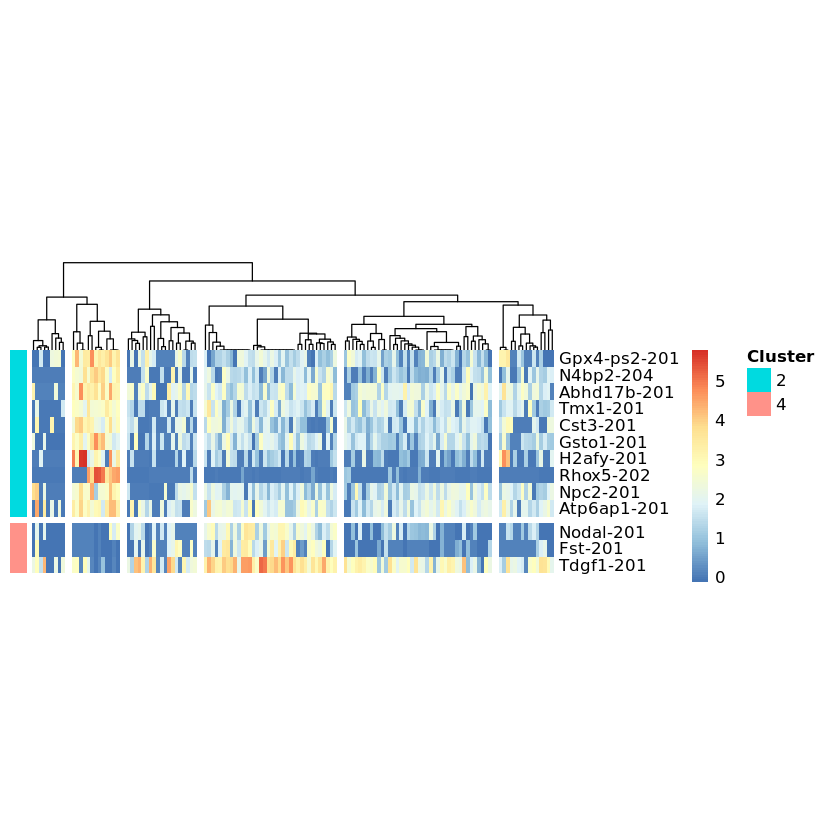

k = 7
k = 8


Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”

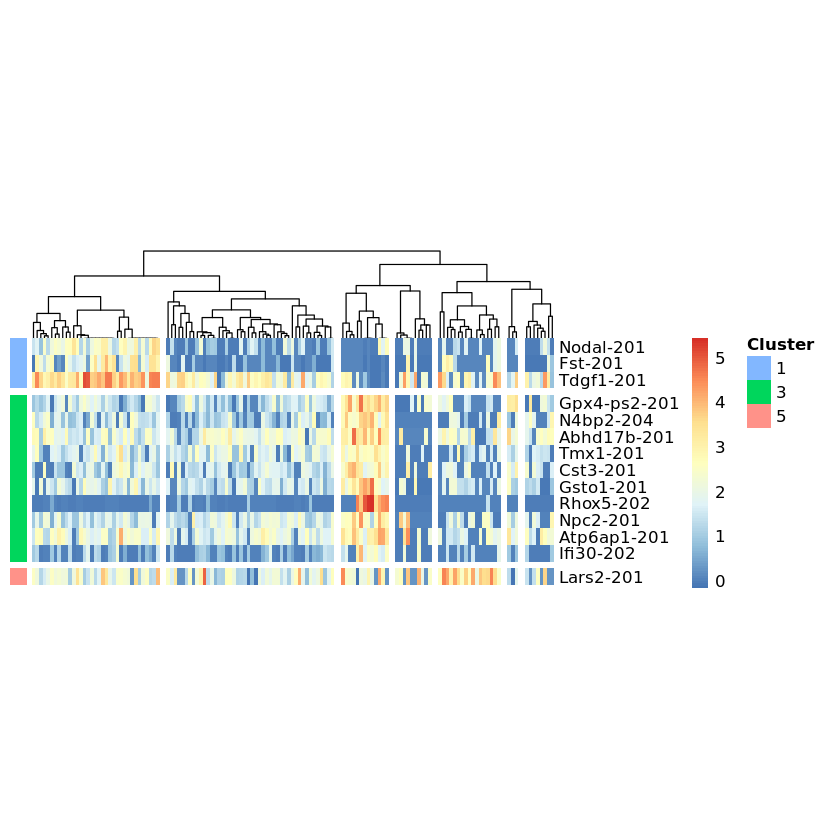

k = 9


k = 10


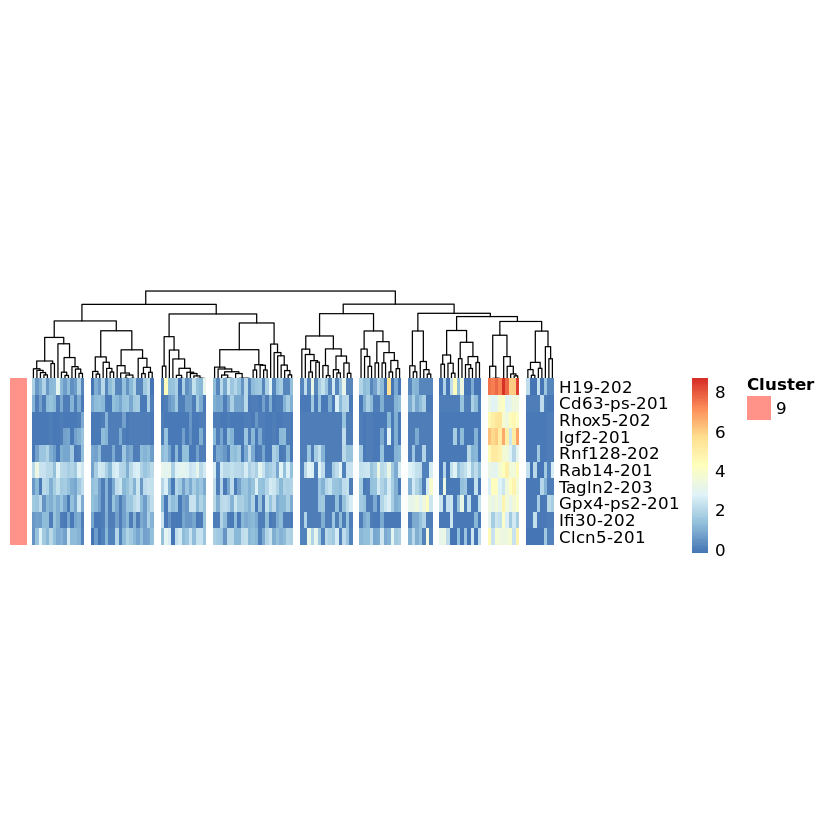

In [70]:
for (i in krange){
    try(
        sc3_plot_markers(sce, i),
        silent = F
    )
    cat(sprintf("k = %.0f\n", i))
}

### notes

In our next step we will use these computed clusters upon some PCA (and/or TSNE) plots to see how well the clusters fit the data.

In [71]:
saveRDS(sce, "matrix.cellQC.geneQC.normalised.ccClean.combat.sc3_clust.rds")